In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df=pd.read_csv('/content/IMDB Top 250 Movies.csv')

In [123]:
df.shape

(250, 13)

In [124]:
df.head(5)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    object 
 7   tagline      250 non-null    object 
 8   budget       250 non-null    object 
 9   box_office   250 non-null    object 
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 25.5+ KB


In [126]:
df.isnull().sum()

rank           0
name           0
year           0
rating         0
genre          0
certificate    0
run_time       0
tagline        0
budget         0
box_office     0
casts          0
directors      0
writers        0
dtype: int64

In [ ]:
df['budget']=df["budget"].str.replace("$","")

In [128]:
df['budget']=pd.to_numeric(df['budget'],errors='coerce', downcast='float') / 1E9

<Axes: >

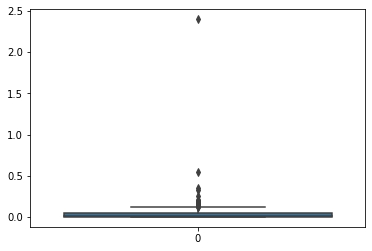

In [129]:
sns.boxplot(df['budget'])

In [130]:
pd.isna(df['budget'])

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247     True
248    False
249    False
Name: budget, Length: 250, dtype: bool

In [131]:
df['budget'] = df['budget'].fillna(df['budget'].median())

In [132]:
df['budget'].nunique()

123

In [ ]:
df['box_office'] = df['box_office'].str.replace('$','')
df['box_office']=pd.to_numeric(df['box_office'],errors='coerce', downcast='float') / 1E9

In [134]:
pd.isna(df['box_office']).sum()

33

<Axes: >

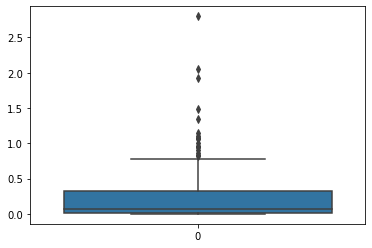

In [135]:
sns.boxplot(df['box_office'])

In [136]:
df['box_office']=df['box_office'].fillna(df['box_office'].median())

In [137]:
df['profit']=df['budget']-df['box_office']

In [138]:
df.head(5)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,profit
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,0.02500,2.888450e-02,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont",-0.003885
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,0.00600,2.503418e-01,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola",-0.244342
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,0.18500,1.006234e+00,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer",-0.821234
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,0.01300,4.796192e-02,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo",-0.034962
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,0.00035,9.550000e-07,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose,0.000349


In [139]:
pd.isna(df).any()

rank           False
name           False
year           False
rating         False
genre          False
certificate    False
run_time       False
tagline        False
budget         False
box_office     False
casts          False
directors      False
writers        False
profit         False
dtype: bool

<Axes: xlabel='box_office', ylabel='Count'>

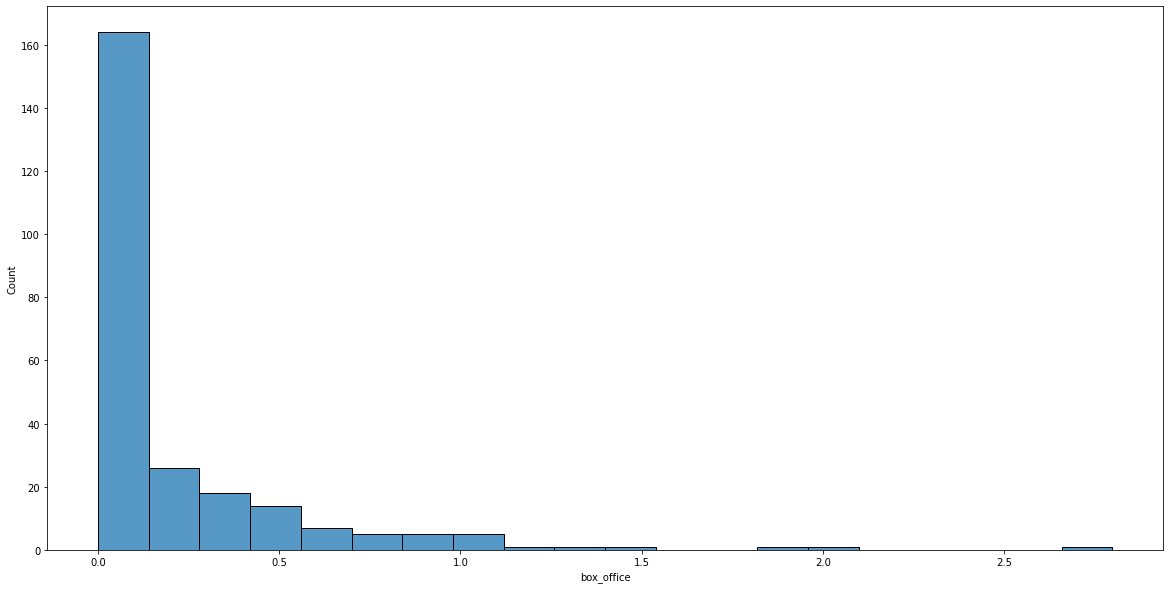

In [140]:
plt.subplots(figsize=(20,10))
sns.histplot(data=df,x='box_office',bins=20)


We can see that most of the moivies got the box office collection around 1 Billion dollers

In [141]:
df[df['box_office']>2]

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers,profit
62,63,Avengers: Infinity War,2018,8.4,"Action,Adventure,Sci-Fi",PG-13,2h 29m,An entire universe. Once and for all.,0.321,2.052415,"Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee",-1.731415
77,78,Avengers: Endgame,2019,8.4,"Action,Adventure,Drama",PG-13,3h 1m,Avenge the fallen.,0.356,2.799439,"Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chr...","Anthony Russo,Joe Russo","Christopher Markus,Stephen McFeely,Stan Lee",-2.443439


In [142]:
real_gen = ""
for i in df['genre']:
    real_gen = real_gen+","+i
all_gen = real_gen.split(',')[1:]
unique_genres = list(set(all_gen))
data = []
for i in unique_genres:
    c = 0
    for j in df['genre']:
        if i in j:
            c+=1
    data.append([i, c])

In [143]:
genre=pd.DataFrame(data,columns=['type','count'])

In [144]:
genre

,type,count
0,Mystery,31
1,Romance,23
2,Animation,23
3,Fantasy,14
4,Adventure,60
5,History,10
6,Music,5
7,Comedy,45
8,Sci-Fi,20
9,Family,13


In [145]:
genre.sort_values(by="count",ascending=False,inplace=True)

In [146]:
genre=genre.head(10)

<Axes: xlabel='type', ylabel='count'>

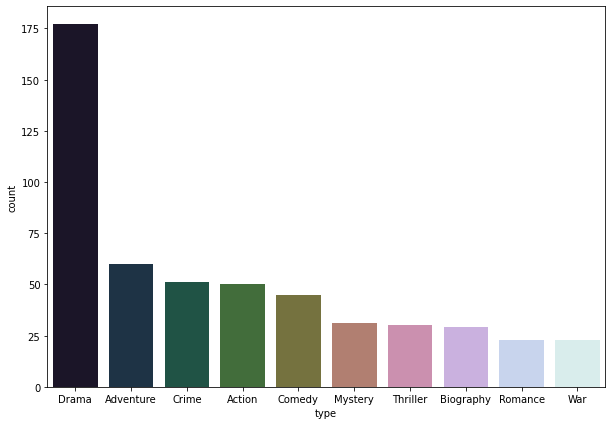

In [147]:
plt.subplots(figsize=(10,7))
sns.barplot(data=genre,x='type',y='count',color='black',palette=("cubehelix"))


Most movies are Drama based follwed by Adventure

In [148]:
data=set(df['certificate'])

In [149]:
rating=data

In [150]:
certi=[]
for i in data:
  c=0
  for j in df['certificate']:
    if j==i:
      c+=1
  certi.append([i,c]) 

In [151]:
certi

[['X', 1],
 ['TV-PG', 1],
 ['G', 19],
 ['Approved', 14],
 ['TV-MA', 1],
 ['R', 97],
 ['PG-13', 35],
 ['Not Available', 1],
 ['13+', 1],
 ['PG', 37],
 ['GP', 1],
 ['18+', 1],
 ['Passed', 16],
 ['Not Rated', 24],
 ['Unrated', 1]]

In [152]:
data=pd.DataFrame(certi,columns=['type','count'])

In [153]:
data.sort_values(by='count',ascending=False,inplace=True)
data=data.head(6)

<Axes: xlabel='type', ylabel='count'>

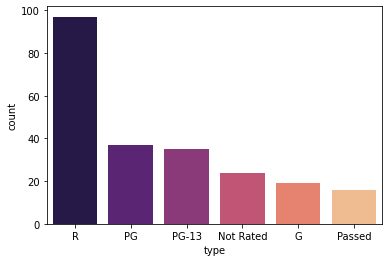

In [154]:
sns.barplot(data,x='type',y='count',palette="magma")

R-Rated Moives are mostly likes by the people

In [155]:
data=set(df['directors'])

In [156]:
data

{'Aamir Khan,Amole Gupte(uncredited)',
 'Adam Elliot',
 'Akira Kurosawa',
 'Alejandro G. Iñárritu',
 'Alfred Hitchcock',
 'Andrew Stanton',
 'Andrew Stanton,Lee Unkrich(co-director)',
 'Anthony Russo,Joe Russo',
 'Asghar Farhadi',
 'Billy Wilder',
 'Bob Persichetti,Peter Ramsey,Rodney Rothman',
 'Bong Joon Ho',
 'Brad Bird',
 'Brad Bird,Jan Pinkava(co-director)',
 'Brian De Palma',
 'Bryan Singer',
 'Buster Keaton',
 'Carl Theodor Dreyer',
 'Carol Reed',
 'Charles Chaplin',
 'Christopher Nolan',
 'Clint Eastwood',
 'Clyde Bruckman,Buster Keaton',
 'Curtis Hanson',
 'Damien Chazelle',
 'Damián Szifron',
 'Danny Boyle',
 'Darren Aronofsky',
 'David Fincher',
 'David Lean',
 'David Lynch',
 'David Yates',
 'Dean DeBlois,Chris Sanders',
 'Denis Villeneuve',
 'Elem Klimov',
 'Elia Kazan',
 'Ernst Lubitsch',
 'Ethan Coen,Joel Coen',
 'Fernando Meirelles,Kátia Lund(co-director)',
 'Florian Henckel von Donnersmarck',
 'Florian Zeller',
 'Francis Ford Coppola',
 'Frank Capra',
 'Frank Darabont'

In [157]:
director=[]
for i in data:
  c=0
  for j in df['directors']:
    if j==i:
      c+=1
  director.append([i,c]) 


In [158]:
director=pd.DataFrame(director,columns=['name','count'])

In [159]:
director.sort_values(by='count',ascending=False,inplace=True)

In [160]:
director=director.head(10)

<Axes: xlabel='name', ylabel='count'>

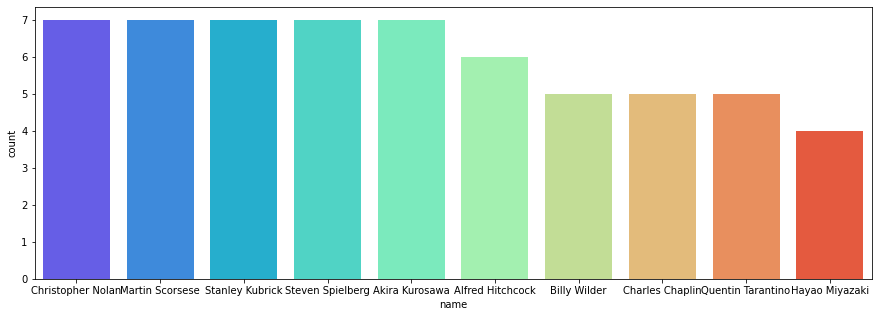

In [161]:
plt.subplots(figsize=(15,5))
sns.barplot(data=director,x='name',y='count',palette="rainbow")


Chistoper Nolan,Martin Scorsese and some are the most sucessfull Directors over the time


<Axes: xlabel='year', ylabel='rating'>

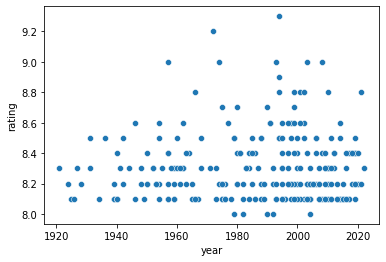

In [162]:
sns.scatterplot(data=df,x='year',y='rating')

([<matplotlib.axis.YTick at 0x7f6cd293fb80>,
 [Text(0, 0, '2h 22m'),
  Text(0, 30, '1h 28m'),
  Text(0, 60, '2h 50m'),
  Text(0, 90, '1h 41m')])

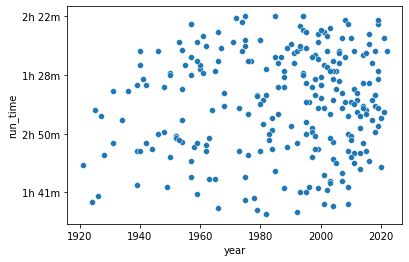

In [163]:
sns.scatterplot(data=df,x='year',y='run_time')
plt.yticks([0,30,60,90])

Duration of the movies increases over the Time

In [164]:
rating

{'13+',
 '18+',
 'Approved',
 'G',
 'GP',
 'Not Available',
 'Not Rated',
 'PG',
 'PG-13',
 'Passed',
 'R',
 'TV-MA',
 'TV-PG',
 'Unrated',
 'X'}

In [165]:
rating_box=[]
for i in rating:
  count=0
  rs=0
  for j in df['certificate']:
    if i==j:
      budget = df.loc[df['certificate'] == i, 'box_office'].iloc[0]
      rs=rs+budget
      count+=1
  rs=rs/count
  rating_box.append([i,rs])  

In [166]:
rating_box=pd.DataFrame(rating_box,columns=['type','avg'])

In [167]:
rating_box.sort_values(by='avg',ascending=False,inplace=True)

In [168]:
rating_box=rating_box.head(10)
rating_box


,type,avg
6,PG-13,1.006234
2,G,0.968512
9,PG,0.538375
11,18+,0.109115
1,TV-PG,0.074037
4,TV-MA,0.074037
8,13+,0.052287
5,R,0.028885
0,X,0.026960
7,Not Available,0.011488


[Text(0.5, 0, 'Type of Certification'),
 Text(0, 0.5, 'Average_Box_Office_Collection_in_Billion')]

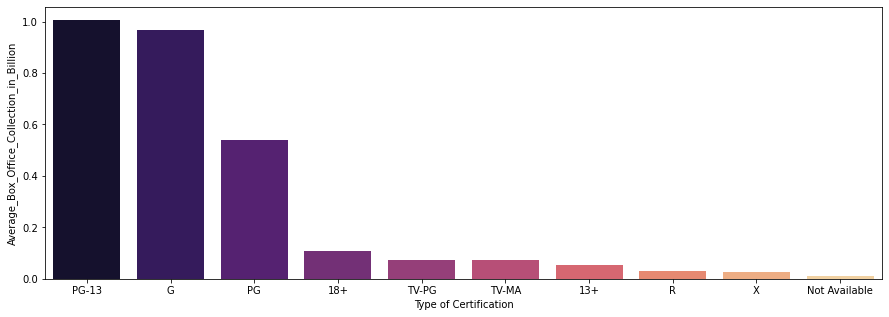

In [169]:
plt.subplots(figsize=(15,5))
ax=sns.barplot(data=rating_box,x='type',y='avg',palette="magma")
ax.set(xlabel='Type of Certification', ylabel='Average_Box_Office_Collection_in_Billion')

In [170]:
profit=[]
for i in rating:
  count=0
  rs=0
  for j in df['certificate']:
    if i==j:
      pro=df.loc[df['certificate']==i,'profit'].iloc[0]
      rs=rs+pro
      count+=1
  rs=rs/count
  profit.append([i,rs])    

In [171]:
profit=pd.DataFrame(profit,columns=['type','avg'])

In [172]:
profit.sort_values(by='avg',ascending=False,inplace=True)
profit=profit.head(7)
profit

,type,avg
13,Not Rated,0.124654
7,Not Available,0.003512
10,GP,0.003200
12,Passed,0.001452
3,Approved,0.000349
14,Unrated,-0.002890
5,R,-0.003885


In [173]:
year=set(df['year'])


In [174]:
frq=[]
for i in year:
  count=0
  for j in df['year']:
    if i==j:
      count+=1
  frq.append([i,count])    

In [175]:
frq=pd.DataFrame(frq,columns=['year','frq'])
frq.sort_values(by='year',ascending=False,inplace=True)
fr=frq.head(10)

In [176]:
fr

,year,frq
85,2022,1
84,2021,2
83,2020,2
82,2019,6
81,2018,4
80,2017,3
79,2016,4
78,2015,4
77,2014,5
76,2013,4


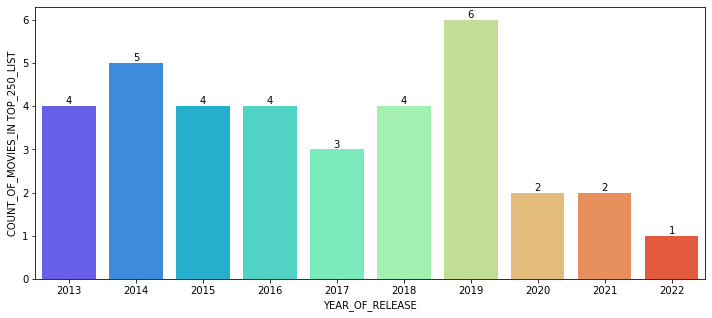

In [177]:
plt.subplots(figsize=(12,5))
ax=sns.barplot(data=fr,x='year',y='frq',palette="rainbow")
ax.set(xlabel="YEAR_OF_RELEASE",ylabel="COUNT_OF_MOVIES_IN TOP_250_LIST")
for i in ax.containers:
    ax.bar_label(i,)

1995 is most success full year Which has 8 movies out of top 250 movies over the Time.
